Importing required libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the required dataset

In [2]:
df = pd.read_csv("D:/Downloads/dataset/iot_telemetry_data.csv")

Exploratory Data Analysis

In [3]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [4]:
df.columns

Index(['ts', 'device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke',
       'temp'],
      dtype='object')

In [5]:
df.shape

(405184, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [7]:
df['motion'] = df['motion'].map({False: 0, True: 1})
df['light'] = df['light'].map({False: 0, True: 1})


In [8]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [9]:
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)

C:\Users\Ananthu Sajith\AppData\Local\Temp/ipykernel_7076/3933403061.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Ananthu Sajith\AppData\Local\Temp/ipykernel_7076/3933403061.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


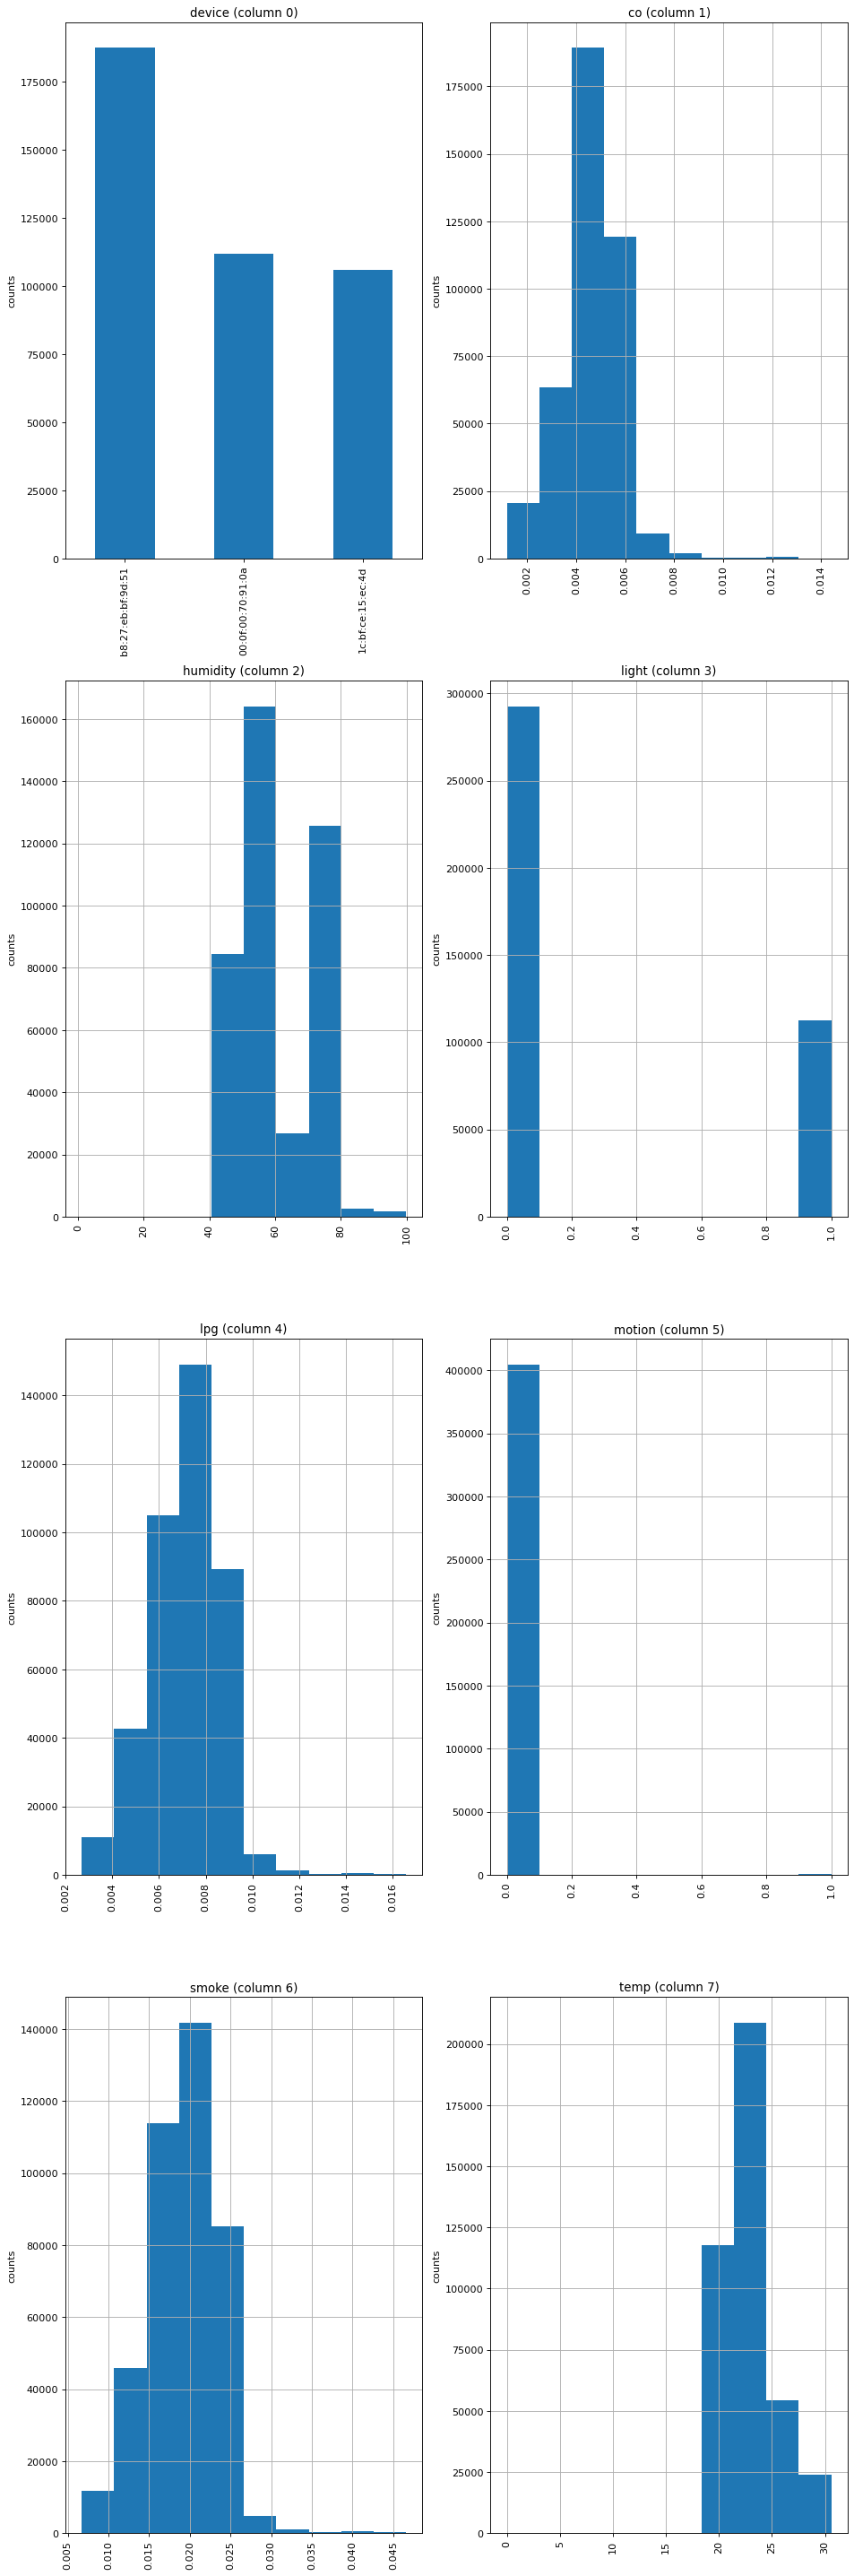

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
pf=df.drop('ts',axis=1)
plotPerColumnDistribution(pf, 10, 2)


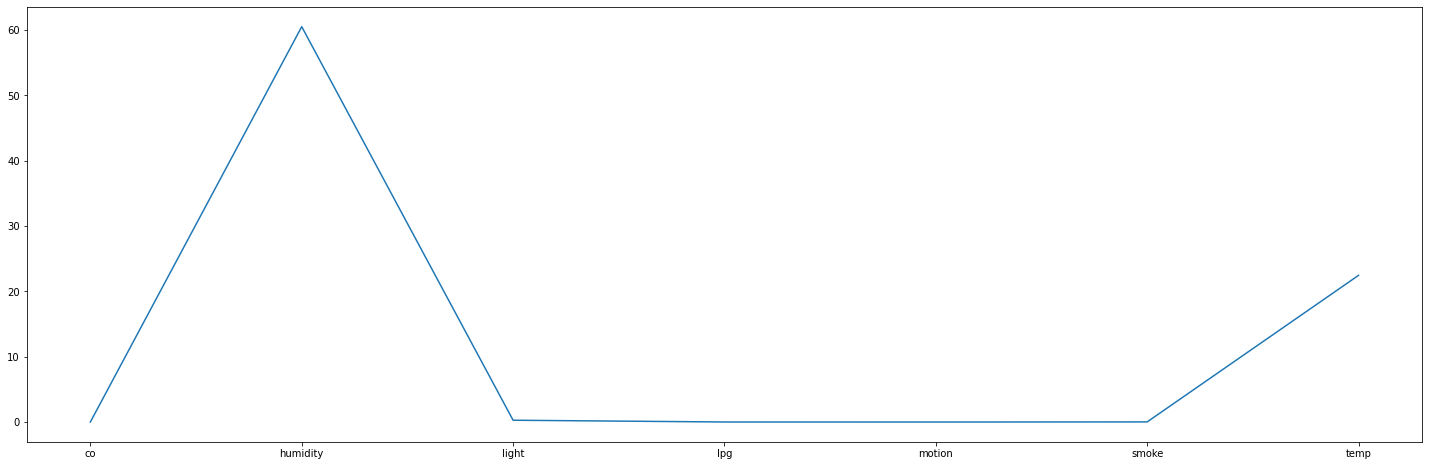

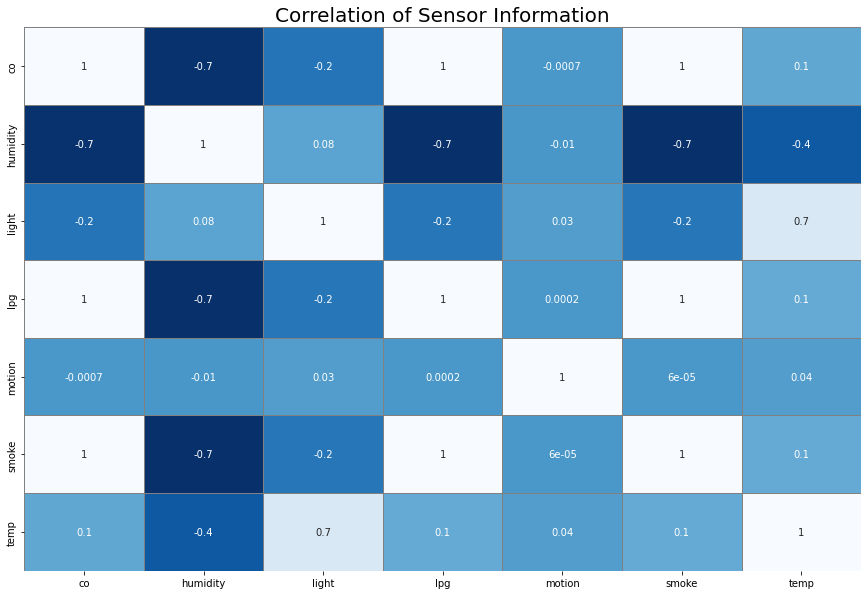

In [11]:
sensor_columns = ['co','humidity', 'light', 'lpg', 'motion', 'smoke', 'temp']
sensor_per_month = df[sensor_columns].mean()   
plt.figure(figsize=(25,8))

sns.lineplot(data=sensor_per_month, dashes=False)


fig,ax = plt.subplots(figsize=(15, 10)) 
corr = df[sensor_columns].corr()
sns.heatmap(corr, annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');ax.set_title('Correlation of Sensor Information', size=20)
plt.show()

In [12]:
df.device.unique()


array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

In [13]:
df['device'] = df['device'].map({'b8:27:eb:bf:9d:51': 0,
                                     "00:0f:00:70:91:0a" : 1, "1c:bf:ce:15:ec:4d" : 2})

In [14]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,0,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,1.594512e+09,1,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.594512e+09,0,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.594512e+09,2,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.594512e+09,0,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [15]:
df.dtypes

ts          float64
device        int64
co          float64
humidity    float64
light         int64
lpg         float64
motion        int64
smoke       float64
temp        float64
dtype: object

Splitting dataset into training and testing sets

In [16]:
x = df.drop("device",axis=1)
x.head()
y = df["device"]
y.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.9)
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape
df['device'].unique()
len(x_train), len(x_test)

(40518, 364666)

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
c.fit(x_train, y_train)
y_pred=c.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
logreg =accuracy_score(y_test,y_pred)
print("Accuracy obtained by Logistic Regression :", logreg*100)

[[168704      0      0]
 [100594      0      0]
 [ 95368      0      0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.46      1.00      0.63    168704
           1       0.00      0.00      0.00    100594
           2       0.00      0.00      0.00     95368

    accuracy                           0.46    364666
   macro avg       0.15      0.33      0.21    364666
weighted avg       0.21      0.46      0.29    364666

Accuracy obtained by Logistic Regression : 46.26260742707025


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuracy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier : 99.99177329391827


K Nearest neighbour Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 42.82110204954671


Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 99.98354658783654


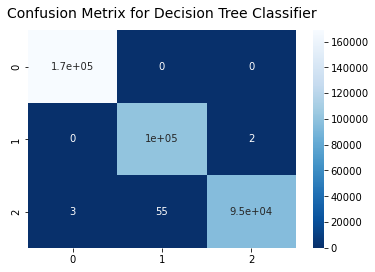

In [26]:
y_pred_tree = tree.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, y=1.03);

In [27]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168704
           1       1.00      1.00      1.00    100594
           2       1.00      1.00      1.00     95368

    accuracy                           1.00    364666
   macro avg       1.00      1.00      1.00    364666
weighted avg       1.00      1.00      1.00    364666



CatBoost Classifier

In [28]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(x_train, y_train);
CatBoostClassifierScore = cat.score(x_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Learning rate set to 0.5
0:	learn: 0.3742922	total: 146ms	remaining: 1.31s
1:	learn: 0.2004185	total: 160ms	remaining: 639ms
2:	learn: 0.1145950	total: 175ms	remaining: 409ms
3:	learn: 0.0674453	total: 194ms	remaining: 292ms
4:	learn: 0.0406582	total: 215ms	remaining: 215ms
5:	learn: 0.0246886	total: 234ms	remaining: 156ms
6:	learn: 0.0152112	total: 253ms	remaining: 108ms
7:	learn: 0.0093860	total: 271ms	remaining: 67.7ms
8:	learn: 0.0059001	total: 291ms	remaining: 32.3ms
9:	learn: 0.0037368	total: 310ms	remaining: 0us
Accuracy obtained by CatBoost Classifier model: 99.98107857601201


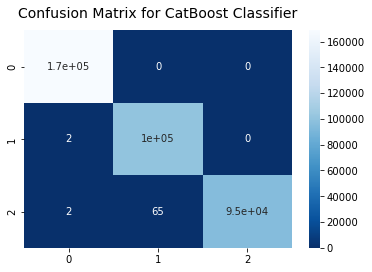

In [29]:
y_pred_cat = cat.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, y=1.03);

Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 99.99012795270193


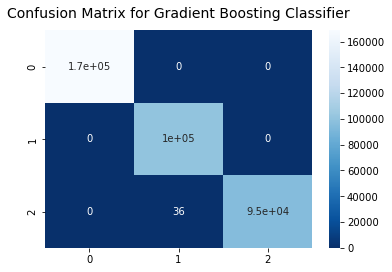

In [31]:
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, y=1.03);

In [32]:
print(metrics.classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168704
           1       1.00      1.00      1.00    100594
           2       1.00      1.00      1.00     95368

    accuracy                           1.00    364666
   macro avg       1.00      1.00      1.00    364666
weighted avg       1.00      1.00      1.00    364666



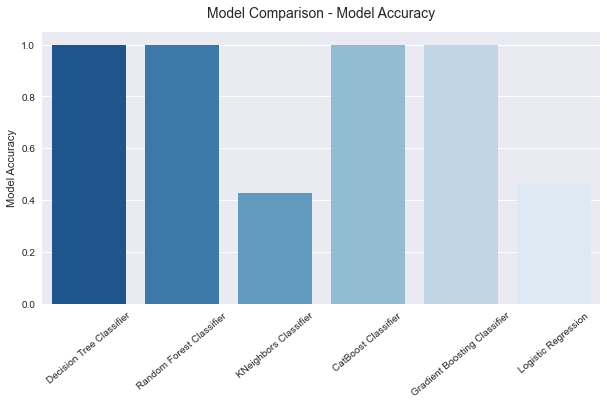

In [33]:
plt.style.use("seaborn")

x = ["Decision Tree Classifier", 
     "Random Forest Classifier", 
     "KNeighbors Classifier", 
     "CatBoost Classifier", 
     "Gradient Boosting Classifier",
    "Logistic Regression"]

y = [DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore,
     logreg]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03);